In [1]:
## all code tested in Python 3.9.7 using jupyter notebook v6.4.5
## with Windows 10 home OS build 19042.1466

In [2]:
## setting random number seed
import random
random.seed(2471)

## Task 1

a) function to determine the number of '1's in the binary representation of a positive number

In [3]:
## function to determine the number of 1s in the binary representation of a positive number
## takes base 10 representation as input
## finds binary representation using bin function
## counts the 1s and returns as integer
def bin_1s(x):
    b = bin(x).replace("0b","") ## get binary representation 
    ones = b.count('1') ## count number of 1s
    return ones

In [4]:
bin_1s(10) ## 10 in base 2 is 1010, output should be 2

2

b) function that determines which bits of the binary representation of a positive integer are '1's

In [52]:
## function that determines the location of the 1s in the binary representation of a positive integer
## takes base 10 representation as input
## finds binary representation using bin function
## creates list of indices for which the corresponding character in binary representation is a 1
## returns this list
def loc_1s(x):
    b = bin(x).replace("0b","") 
    indices = [i for i, x in enumerate(b) if x=="1"] ## include index i in list if b[i]==1
    return indices ## output list

In [53]:
loc_1s(10) ## looking at 1010, output should be 0,2

[0, 2]

c) function that finds how many equal pairs of teams possible with 2k individuals

In [7]:
from math import comb ## import choose function from math

In [8]:
## function to determine the number of equal pairs of teams possible with 2k individuals 
## uses comb from math to calculate 2k choose k
## then uses // operator to divide by 2 as this will return an integer which looks nicer
## (can do this since output of comb will always be even)
## returns integer number of pairs
def no_pairs(k):
    return comb(2*k,k)//2 ## number of pairs is equal to ways of picking k from 2k, divided by 2

In [9]:
no_pairs(2) ## for 4 individuals, we have (12,34),(13,24),(14,23) so output should be 3

3

d) function that generates all the possible pairs of teams of size k

In [10]:
from itertools import combinations ## need this for teams function

In [11]:
## function that generates all possible teams of size k
## modified problem to take as input integer k (easier for testing)
## then generates a list of 2k individuals [1,2,...,2k]
## then uses combinations from itertools to find all selections of size k without repeats
## pairs outermost teams together sequentially to give answer and returns
def teams(k):
    l = [i+1 for i in range(2*k)] ## generates list
    com = list(combinations(l,k)) ## lists selections of size k without repeats (ie all possible individual teams)
    t = [(com[i],com[len(com)-i-1]) for i in range(len(com)//2)] ## pairing opposite teams together 
    return t

In [12]:
teams(2) ## want to see (12,34),(13,24),(14,23)

[((1, 2), (3, 4)), ((1, 3), (2, 4)), ((1, 4), (2, 3))]

In [13]:
no_pairs(8)

6435

In [14]:
len(teams(8)) ## testing for large(ish) k - length should be the same as no_pairs(8)

6435

## Task 2

a) I will use a dictionary (of lists) to represent the preference tables by creating two dictionaries each containing four lists. One will have each list indexed by a capital letter (males), with the list contents for each index being the order of preference for the male corresponding to the indexing capital letter. The second dictionary will similarly represent the order of preference of the females. I select a dictionary for this because other python data structures do not allow elements to be indexed by letters, e.g. lists.

b) I will use a list of tuples to represent a matching. I select this because the order of the matchings is important (first element will represent males, second females). 

## Task 3

In [15]:
## function to generate random preference tables from 
## takes 2 lists of equal length as input
## creates 2 dictionaries with the elements of each list as keys (one dictionary for each list)
## assigns to the keys in each dictionary a random shuffle of the keys of the other dictionary (as a list)
## returns the two dictionaries 
def pref(m,f):
    M={};F={} ## initialise dictionaries
    for j in m: M[j]=random.sample(f,len(f)) ## assign male preferences
    for j in f: F[j]=random.sample(m,len(m)) ## assign female preferences
    return M,F

In [16]:
## testing function produces a reasonable looking output
random_pref = pref(["A","B"],["a","b"])
random_pref

({'A': ['b', 'a'], 'B': ['b', 'a']}, {'a': ['A', 'B'], 'b': ['B', 'A']})

In [17]:
## assertion test for random number seed
assert random_pref == ({'A': ['b', 'a'], 'B': ['b', 'a']}, {'a': ['A', 'B'], 'b': ['B', 'A']})

## Task 4

In [18]:
## a function to determine if a pair of two preference tables is valid
## takes as input to corresponding preference tables as dictionaries of lists
## checks if the sorted list of the keys from each dictionary is equal to each of the sorted lists of values from the other dictionary 
## returns false if this is found to not be the case for any key/value pair
## returns true if keys/values are checked without a difference being found
def pref_valid(dm,df):
    for i,j in zip(list(df.values()),list(dm.values())): ## iterate over values in each dictionary
        if list(dm.keys()) != sorted(i) or list(df.keys()) != sorted(j): ## check for difference between preferences and keys
            return False ## declare not valid if difference found
    return True ## return true otherwise

In [19]:
dm, df = pref(["A","B","C","D"],["a","b","c","d"]) ## using valid preference table
pref_valid(dm,df)

True

In [20]:
d1={1:[0,0,0], 2:[0,0,0], 3:[0,0,0]} ## correct number of dimensions but wrong content
d2={3:[4,4,8], 5:[6,6,8], 7:[8,8,8]}

In [21]:
pref_valid(d1,d2)

False

In [22]:
d3 = {"A":["a","b","B"],"B":["a","b"]} ## correct content but not dimensions
d4 = {"a":["A","B"],"b":["A","B"]}

In [23]:
pref_valid(d3,d4)

False

Demonstration with preference tables from lecture notes:

In [24]:
test_dm = {"A":["c","b","d","a"],"B":["b","a","c","d"], "C":["b","d","a","c"], "D":["c","a","d","b"]}
test_df = {"a":["A","B","D","C"], "b":["C","A","D","B"], "c":["C","B","D","A"], "d":["B","A","C","D"]}

In [25]:
pref_valid(test_dm,test_df)

True

## Task 5

In [26]:
## function to determine if a mactching for a given pair of preference tables is stable
## takes as input a preference table pair as dictionaries of lists and a matching as a list of tuples
## iterates over the matching pairs
## considers the male in the pair and generates a list of females the male prefers to his wife
## then iterates over this list
## generates a list of males each of these females prefers to their current husband
## checks if the current male being considered exists in this list - matching is declared unstable if this is the case
## if not for all males, matching is declared stable
## returns boolean value
def stable(dm,df,match):
    for k in match: ## for each matching pair
        male_preferred = [i for i in dm[k[0]] if dm[k[0]].index(i)<dm[k[0]].index(k[1])] ## get list of what each male prefers to current mathcing
        for j in male_preferred: ## for each female current male (k[0]) prefers
            female_match = [k[0] for k in match if k[1]==j][0] ## find current matched male
            female_preferred = [i for i in df[j] if df[j].index(i)<df[j].index(female_match)] ## get list of males female prefers to current match
            if (bool(set(k[0]) & set(female_preferred))): return False ## if current male is in preferred list for female, matching is unstable
    return True

Test with unstable matchings from lecture notes:

In [27]:
test_dm = {"A":["c","b","d","a"],"B":["b","a","c","d"], "C":["b","d","a","c"], "D":["c","a","d","b"]}
test_df = {"a":["A","B","D","C"], "b":["C","A","D","B"], "c":["C","B","D","A"], "d":["B","A","C","D"]}

In [28]:
match = [("A","a"),("B","b"),("C","c"),("D","d")]
stable(test_dm,test_df,match)

False

In [29]:
match = [("A","b"),("B","a"),("C","c"),("D","d")]
stable(test_dm,test_df,match)

False

In [30]:
match = [("A","c"),("B","a"),("C","b"),("D","d")]
stable(test_dm,test_df,match)

False

Test with stable matching from lecture notes:

In [31]:
match = [("A","d"),("B","a"),("C","b"),("D","c")]
stable(test_dm,test_df,match) ## expect True

True

## Task 6

In [32]:
## function to determine the score of a matching for a preference table pair
## takes as input a preference table pair as dictionaries of lists and a matching as a list of tuples
## creates and sums over a list of the indexes for each male in the matched to female's preference order
## creates and sums over a list of the indexes for each female in the matched to male's preference order
## returns these two as integers
def score(dm,df,match):
    scoref = sum([df[k[1]].index(k[0]) for k in match]) ## take preference index (0,1,2,3) of each matching for female
    scorem = sum([dm[k[0]].index(k[1]) for k in match]) ## take preference index (0,1,2,3) of each matching for male
    return scorem,scoref

In [33]:
## consider example from lectures
test_dm = {"A":["c","b","d","a"],"B":["b","a","c","d"], "C":["b","d","a","c"], "D":["c","a","d","b"]}
test_df = {"a":["A","B","D","C"], "b":["C","A","D","B"], "c":["C","B","D","A"], "d":["B","A","C","D"]}
match = [("A","d"),("B","a"),("C","b"),("D","c")]

In [34]:
test_score = score(test_dm,test_df,match) ## expect 2+1+0+0=3 and 1+1+2+0=4
test_score

(3, 4)

## Task 7

a) I could include the "very undesirable" imaginary man in my preference table dictionaries by adding a fifth element "O" to each of the females' preference lists.  

In [35]:
## function to implement the fundamental algorithm to find a stable matching
## takes as input a pair of preference tables as dictionaries of lists
## uses deepcopy from copy to avoid issues with two labels referencing the same dictionary by creating a deepcopy of each 
## deals with very undesiarable man by appending to each element of the female dictionary "O"
## creates list of tuples matching where each female is paired with this "O" for initial matching
## performs fundamental algorithm described in lecture notes
## returns stable matching as list of tuples
import copy
def fundamental(dm,df):
    df2=copy.deepcopy(df); dm2=copy.deepcopy(dm) ## create local versions of preference tables to edit
    for i in df2.keys(): df2[i].append("O") ## add imaginary man O
    match = [("O",j) for j in df2.keys()] ## temporarily engage all women to O 
    for i in dm2.keys():
        X=i ## set to ith man
        while X != "O":
            x = dm2[X][0] ## set to most wanted women for ith man
            x_fiance = [k[0] for k in match if k[1]==x][0] ## get current fiance for x
            if df2[x].index(X) < df2[x].index(x_fiance): ## check if x prefers new option
                match = [(X,x) if i==(x_fiance,x) else i for i in match] ## engage X and x
                X = x_fiance ## set X to jilted fiance
            if X != "O": dm2[X].remove(x) ## remove best choice from ith man's list/remove ex-fiance from jilted's list
    return match  

Testing using preference tables from lecture notes:

In [36]:
lec_dm = {"A":["c","b","d","a"],"B":["b","a","c","d"], "C":["b","d","a","c"], "D":["c","a","d","b"]}
lec_df = {"a":["A","B","D","C"], "b":["C","A","D","B"], "c":["C","B","D","A"], "d":["B","A","C","D"]}

In [37]:
fundamental(lec_dm,lec_df) ## outputs stable matching given in lecture notes

[('B', 'a'), ('C', 'b'), ('D', 'c'), ('A', 'd')]

Testing with random preference tables:

In [38]:
test_dm, test_df = pref(["A","B","C","D"],["a","b","c","d"])

In [39]:
test_match=fundamental(test_dm,test_df)
test_match

[('C', 'a'), ('D', 'b'), ('A', 'c'), ('B', 'd')]

In [40]:
## assertion test for random number seed
assert test_match == [('C', 'a'), ('D', 'b'), ('A', 'c'), ('B', 'd')]
assert test_dm == {'A': ['b', 'c', 'a', 'd'], 'B': ['c', 'd', 'b', 'a'], 'C': ['a', 'b', 'd', 'c'], 'D': ['a', 'b', 'c', 'd']}
assert test_df == {'a': ['B', 'A', 'C', 'D'], 'b': ['C', 'B', 'D', 'A'], 'c': ['A', 'C', 'B', 'D'], 'd': ['A', 'D', 'C', 'B']}

In [41]:
stable(test_dm,test_df,test_match) ## check this is a stable matching

True

## Task 8

In [42]:
import time

In [43]:
## function for creating two preference tables from lists of size n
## creates create males [(M1,M2,...,MN)] and females [(F1,F2,...,FN)]
## then uses pref function from Task 3 to form preference tables
def create_pref(n): 
    males = ["M"+str(i) for i in range(n)] ## create males 
    females = ["F"+str(i) for i in range(n)] ## create females 
    return pref(males, females) ## form prefence tables

In [44]:
## function for timing implementation of fundamental algorithm on n dimensional matrix
## begins by creating generic n dimensional preference tables using creat_pref functin
## then records time taken to find stable matching using fundamental function
def timer(n): 
    dm,df = create_pref(n) ## create random preference tables
    start = time.perf_counter() ## take initial time
    fundamental(dm,df) ## perform algorithm
    end = time.perf_counter() ## take end time
    return (end-start) ## return time elapsed

In [45]:
times={}
N = 100; r = 10 ## N = max number of males/females to go to, r = number of replications 
## N = 100; r = 500 ## i used this for a smoother curve
for i in range(2,N+1): ## implement timer function r times for each size N
    times[i]=[timer(i)]
    for j in range(r-1): times[i].append(timer(i))

In [46]:
import matplotlib.pyplot as plt

In [47]:
av_times = {} 
for i in times.keys(): av_times[i] = sum(times[i])/len(times[i]) ## average implementation times over replications 

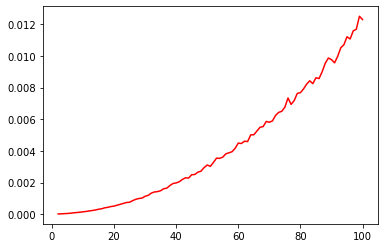

In [48]:
plt.plot(list(av_times.keys()), list(av_times.values()),color='red'); print("") ## plot 

The time taken to perform the fundamental algorithm appears to grow in n^2. This makes sense in relation to my implementation of the algorithm as there are n men to check with (proportional to) n women to check their eligibilty to.

## Task 9

In [49]:
n=100 ## dimension of preference tables
r=1000 ## number of repetitions
scores = []
for i in range(r):
    dm, df = create_pref(n)
    scores.append(score(dm,df,fundamental(dm,df)))

In [50]:
## assertion test for random number seed
sum_scores = sum([i+j for (i,j) in scores])
assert sum_scores == 2332731

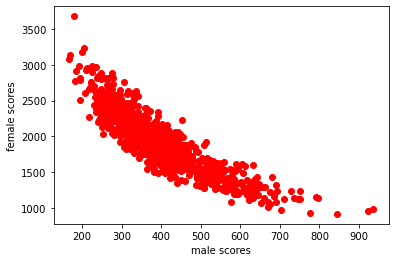

In [51]:
mscores = [i for (i,j) in scores]
fscores = [j for (i,j) in scores]
plt.plot(mscores,fscores,'o',color='red')
plt.xlabel("male scores"); plt.ylabel("female scores"); print("")

There appears to be a negative (roughly linear) negative correlation between the scores for males and females. This makes sense as the action in the algorithm which reduces female score (replacing their fiance with a preferable male) consequently increases the score for the replaced male.

The male scores are also generally much lower than the females. This makes sense as we approach the fundamental agolorithm from the males perspective, attempting to assign them to their most preferred viable female.

## Task 10

Re-runnable: I provided information about the Python version, the Jupyter notebook version and the OS the code was tested on.

Repeatable: Added setting a random number seed at the start of the notebook.

Reproducible: Added assertions throughout to determine if random functions give outputs expected with given random number seed. Also made sure all plots come from the same (latest) version and that plotting code and data is given with plots.

Reusable: Added more in-line comments to code and provided more detailed information about the system the code had been tested on - e.g. OS version.

Replicable: Added detailed explantation of the inputs, processes and outputs of each function with the aim that it would be possible to just read these and replicate the behaviour of the function in any programming language. 